In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('eda_data_files\seoul_weather.csv',skiprows=9,encoding='cp949')


# 실행시킬 ipynb 파일과 같은 경로에 csv 파일을 놓는다.
# pd.read_csv('파일명', skiprows = 9 , encoding='cp949')
# skiprows : 스킵할 행을 의미한다.
# encoding : cp949, euckr , utf8 중에 하나가 설정된다.


df.drop(df.columns[0:2],axis=1,inplace=True)
#df.isnull().sum()
#df.isnull().sum()/len(df)
df.drop(['\t최고기온시각', '최저기온시각'],axis=1,inplace=True)
df.columns = ['일시', '평온','고온','저온']

# 일교차 값 넣기
df['일교차'] = df['고온'] - df['저온']
df['연'] = df['일시'].apply(lambda x : x.split('-')[0])
df['달'] = df['일시'].apply(lambda x : x.split('-')[1])
df['일'] = df['일시'].apply(lambda x : x.split('-')[2])

df.set_index('일시',inplace=True)

df.head(5)



In [ ]:
# 일교차 가장 큰 날
df[df['일교차'].max() == df['일교차']]

# 일교차 가장 큰 달
df.groupby('달')['일교차'].sum().sort_values(ascending=False).dropna().index[0]

# 가장 더운 해
df.groupby('연')['고온'].mean().sort_values(ascending=False).dropna().index[0]
# 가장 더운 월
df.groupby('달')['고온'].mean().sort_values(ascending=False).dropna().index[0]
# 가장 더운 날
df.groupby('일')['고온'].mean().sort_values(ascending=False).dropna().index[0]
# 역대 최고 기온
df[df['고온'].max() == df['고온']][['일시','고온']]

# 가장 추운 해
df.groupby('연')['저온'].mean().sort_values(ascending=True).dropna().index[0]
# 가장 추운 월
df.groupby('달')['저온'].mean().sort_values(ascending=True).dropna().index[0]
# 가장 추운 날
df.groupby('일')['저온'].mean().sort_values(ascending=True).dropna().index[0]
# 역대 최저 기온 
df[df['저온'].max() == df['저온']][['일시','저온']]
# 연도별 평균기온 추이
df.groupby('연')['평온'].mean().sort_values(ascending=True).dropna().index[0]

In [ ]:
df.groupby('연')['평온'].mean().plot(figsize=(5,3))

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\OnlineRetail.csv')
df.head(5)

df.isnull().sum()
df['CustomerID'].notnull()  # null 이 아닌게 True
df['CustomerID'].isnull()   # null 인 것만 True

df1 = df[pd.notnull(df['CustomerID'])]
df1.isnull().sum()
df1.head(2)

df1[df1['UnitPrice'] != 0]
df1.head(3)

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['CheckoutPrice'] = df1['Quantity'] * df1['UnitPrice']
df1


C:\Users\GJ\AppData\Local\Temp\ipykernel_10524\2768379515.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
C:\Users\GJ\AppData\Local\Temp\ipykernel_10524\2768379515.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CheckoutPrice'] = df1['Quantity'] * df1['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


C:\Users\GJ\AppData\Local\Temp\ipykernel_10524\957954852.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mon'] = df1['InvoiceDate'].astype('str').apply(lambda x : x[:7])


<Axes: xlabel='mon'>

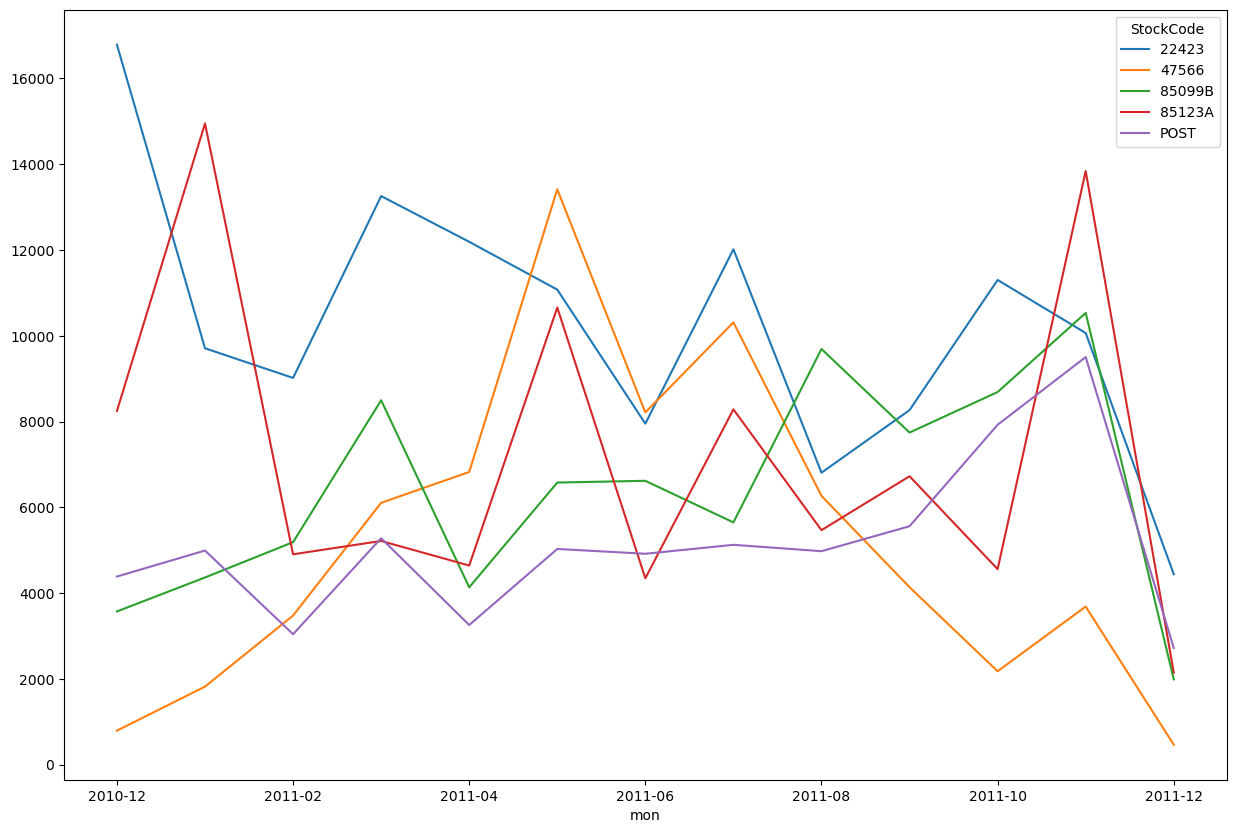

In [89]:
# 국가별 매출
df1.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)

# 월별 매출
df1.groupby(df1['InvoiceDate'].dt.month)['CheckoutPrice'].sum().sort_values(ascending=False)

# 매출 10대 상품
df1[['CheckoutPrice','Description']].sort_values('CheckoutPrice',ascending=False).head(10)

df1.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False).iloc[:10]

#df1['mon'] = df1['InvoiceDate'].astype('str').apply(lambda x : x.split('-')[:2])
df1['mon'] = df1['InvoiceDate'].astype('str').apply(lambda x : x[:7])

# 매출 상위 5대 상품의 월별 판매추이
#head_description = df1[['CheckoutPrice','Description']].sort_values('CheckoutPrice',ascending=False).head(5)['Description']
top5codes = df1.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False).iloc[:5].index
top5codes_df1 = df1[df1['StockCode'].isin(top5codes)]

top5codes_df1.groupby(['StockCode','mon'])['CheckoutPrice'].sum().unstack().T.plot(figsize=(15,10))




In [113]:
# cohort 분석

# 동질적인 집단을 묶어서 집단별로 분석...
# 월별 처음 구매한 고객인 얼마나 지속적으로 구매를 하는가...
# 서로 다른 집단간의 시간에 따른 변화를 관찰, 분석...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\OnlineRetail.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# 날짜 
df['month'] = df['InvoiceDate'].apply(lambda x : datetime(x.year, x.month, 1))

#def get_month_asdatetime(date):
 
# 최초 구매월을 칼럼에 추가...
#df.groupby('CustomerID')['month'].min()
#df['monthstarted'] = datetime(1900,1,1)
#df.head(3)

df.dropna(inplace=True)
df.head(3)

grouped = df.groupby('CustomerID')['month'].min()
grouped.index = grouped.index.astype('str')
grouped.head()



CustomerID
12346.0   2011-01-01
12347.0   2010-12-01
12348.0   2010-12-01
12349.0   2011-11-01
12350.0   2011-02-01
Name: month, dtype: datetime64[ns]

In [114]:
# 최초 구매 넣기
temp = []
for cid in df.CustomerID:
  fm = grouped.loc[str(cid)]
  temp.append(fm)
#  print(cid, fm)
temp

[Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2010-12-

In [116]:
df['monthstarted'] = temp
df.head(3)

# 구매상태 확인
df['monthpassed'] = (df['month'].dt.year - df['monthstarted'].dt.year)*12 + (df['month'].dt.month - df['monthstarted'].dt.month)

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,monthstarted,monthpassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0


In [125]:
cohort_group = df.groupby(['monthstarted', 'monthpassed'])

def get_unique_no(x):
    return len(np.unique(x))

customer_cohort = cohort_group['CustomerID'].agg(get_unique_no).unstack()
customer_cohort

monthpassed,0,1,2,3,4,5,6,7,8,9,10,11,12
monthstarted,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
customer_cohort.div(customer_cohort[0], axis=0)

monthpassed,0,1,2,3,4,5,6,7,8,9,10,11,12
monthstarted,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
# 정규표현식
import re

#비밀번호


# \d : 숫자
# \w : 문자, 숫자, 밑줄 문자.
# \s : 빈칸, 탭, 줄바꿈

# [] : 사용자가 직접 패턴을 지정하는 사용자정의 패턴
# [aeiouAEIOU] : 모음 문자
# [a-zA-z] : 모든 영문자
# [a-zA-Z0-9] : 모든 영문 대소문자, 숫자
# [^] : not을 의미, 지정된 패턴이 등장하지 않는 문자열 선택


# group 첫번째 탐색된 문자열
reg = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d') 
mo = reg.search('My number is 415-555-2323')
mo.group()

reg = re.compile(r'Batman|Tina Fey')    # | or
mo = reg.search('Batman and Tina Fey')
mo.group()

reg = re.compile(r'Bat(wo)?man')        # ? : 앞의 문자열이 1 또는 0번 반복되는 패턴
mo = reg.search('The Adventures of Batwoman')
mo.group()

reg = re.compile(r'Bat(wo)*man')        # * : 앞의 문자열이 0번 이상 등장하는 패턴
mo = reg.search('The Adventures of Batwowoman')
mo.group()

reg = re.compile(r'Bat(wo)+man')        # + : 앞의 문자열이 1번 이상 등장하는 패턴
mo = reg.search('The Adventures of Batwowoman')
mo.group()

reg = re.compile(r'Bat(wo){3}man')        # {} : 정확한 반복 횟수 지정 패턴
mo = reg.search('The Adventures of Batwowowoman')
mo.group()

reg = re.compile(r'Bat(wo){3,5}man')        # {x,y} : x에서 y번째까지 반복 횟수 지정 패턴
mo = reg.search('The Adventures of Batwowowowoman')
mo.group()

# findall 리스트에 전부 담아 리턴
reg = re.compile(r'\d\d\d-\d\d\d{0,2}-\d\d\d\d')
mo = reg.findall('Home : 414-555-7878, Work : 022-7458-6523')
mo

reg = re.compile(r'\d+\s\w+')               # 숫자가 하나이상 나오고, 스페이스, 문자가 하나 이상 패턴
mo = reg.findall('12 drums, 11 pipers, 10 loards, 9 ladies, 8 maids, 7 swans')
mo

['12 drums', '11 pipers', '10 loards', '9 ladies', '8 maids', '7 swans']

In [184]:
reg = re.compile(r'[aeiouAEIOU]')   # 모음만
mo = reg.findall('emart song is very addicted, good FOOD')
mo

reg = re.compile(r'[^aeiouAEIOU]')  # 모음을 제외한 나머지
mo = reg.findall('emart song is very addicted, good FOOD')
mo

# ^ - 시작부분을 의미
# $ - 문자열의 끝을 의미

reg = re.compile(r'^Hello')     # ^ 문자열의 시작
mo = reg.findall('Hello World')
mo

reg = re.compile(r'Hello')
mo = reg.findall('JUN!!!!!! Hello')
mo

reg = re.compile(r'\d+$')       # $ 문자열의 마지막
mo = reg.findall('Your number 55 is 42')
mo

reg = re.compile(r'\w*\d+')     # 문자는 안나와도 된다, 숫자는 연속적이어야한다
mo = reg.findall('Your number 55 is 42')
mo

reg = re.compile(r'^\d+$')      # 숫자로 시작하고 숫자로 끝난다 (순수한 숫자)
mo = reg.findall('125123')
mo

['125123']